# Kunskapskontroll 1 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: 

Datum då du presenterade ditt arbete på lektionen: 

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: 

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Below, set your own path where you have stored the data file. 
housing_df = pd.read_csv(r'C:\Users\Imthias\Downloads\ec utbildning\housing.csv')

In [3]:
housing_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA

In [4]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Drop the "ocean_proximity" column
housing_df.drop(columns=['ocean_proximity'], inplace=True)

In [7]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [8]:
# Split data into features and target
X = housing_df.drop(columns=['median_house_value'])
y = housing_df['median_house_value']

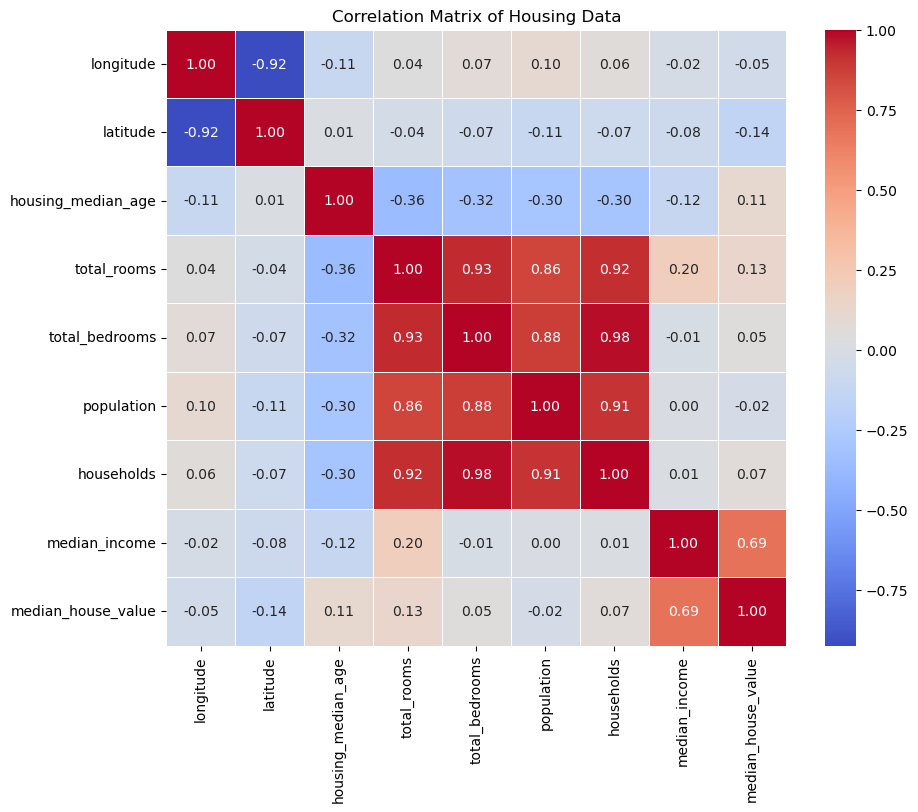

In [9]:
# Correlation matrix
corr_matrix = housing_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Housing Data")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [11]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [12]:
# Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_imputed, y_train)

linear_reg_predictions = linear_reg_model.predict(X_test_imputed)
scores_lr = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('RMSE for each iteration:', np.sqrt(-scores_lr))


linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
print("Linear Regression RMSE on Test Set:", linear_reg_rmse)


# Calculate MAE
linear_reg_mae = (mean_absolute_error(y_test, linear_reg_predictions))
print("Linear Regression MAE on Test Set:", linear_reg_mae)

# Calculate MSE
linear_reg_mse = (mean_squared_error(y_test, linear_reg_predictions))
print("Linear Regression MSE on Test Set:", linear_reg_mse)

RMSE for each iteration: [69566.58539613 68268.29946143 68585.2765451  68798.72850061
 72442.37299663]
Linear Regression RMSE on Test Set: 71131.25918417344
Linear Regression MAE on Test Set: 51810.089334973876
Linear Regression MSE on Test Set: 5059656033.126058


In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

lasso_model = Lasso()
lasso_params = {'alpha': [0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_imputed, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_predictions = lasso_best.predict(X_test_imputed)

# Cross-validation scores using the best estimator
scores_lasso = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('RMSE for each iteration:', np.sqrt(-scores_lasso))

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print("Lasso RMSE on Test Set:", lasso_rmse)

# Calculating MAE
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print("Lasso MAE on Test Set:", lasso_mae)

# Calculating MSE
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE on Test Set:", lasso_mse)

print("Best alpha value for Lasso:", lasso_best.alpha)


RMSE for each iteration: [69566.65645104 68268.90470348 68585.78677289 68797.79278683
 72442.04164122]
Lasso RMSE on Test Set: 71130.43271078923
Lasso MAE on Test Set: 51809.3105827867
Lasso MSE on Test Set: 5059538457.624114
Best alpha value for Lasso: 10


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest model
random_forest_model = RandomForestRegressor()

# Train the Random Forest model
random_forest_model.fit(X_train_imputed, y_train)

# Make predictions
random_forest_predictions = random_forest_model.predict(X_test_imputed)


# Calculate RMSE
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
print("Random Forest RMSE on Test Set:", random_forest_rmse)

Random Forest RMSE on Test Set: 49537.628500774634


In [17]:
print("Linear Regression RMSE:", linear_reg_rmse)
print("Lasso RMSE:", lasso_rmse)
print("Random Forest RMSE:", random_forest_rmse)

Linear Regression RMSE: 71131.25918417344
Lasso RMSE: 71130.43271078923
Random Forest RMSE: 49537.628500774634


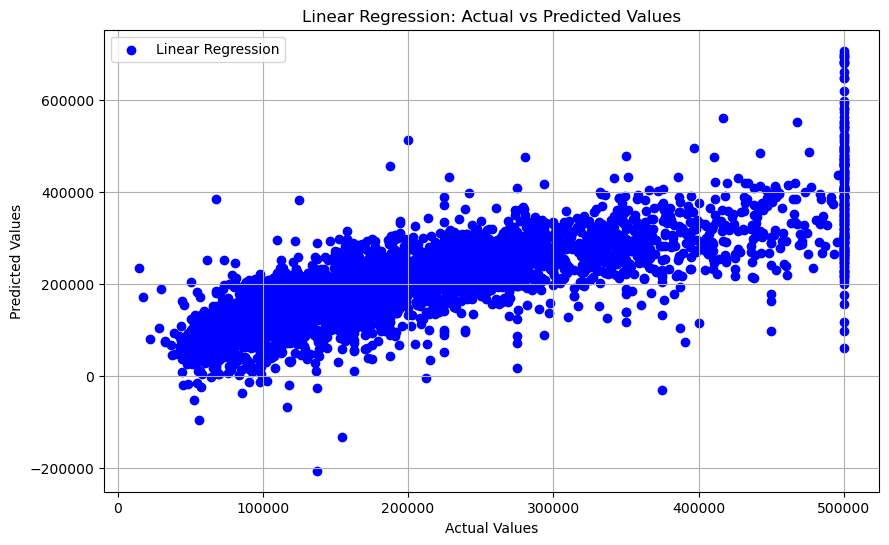

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



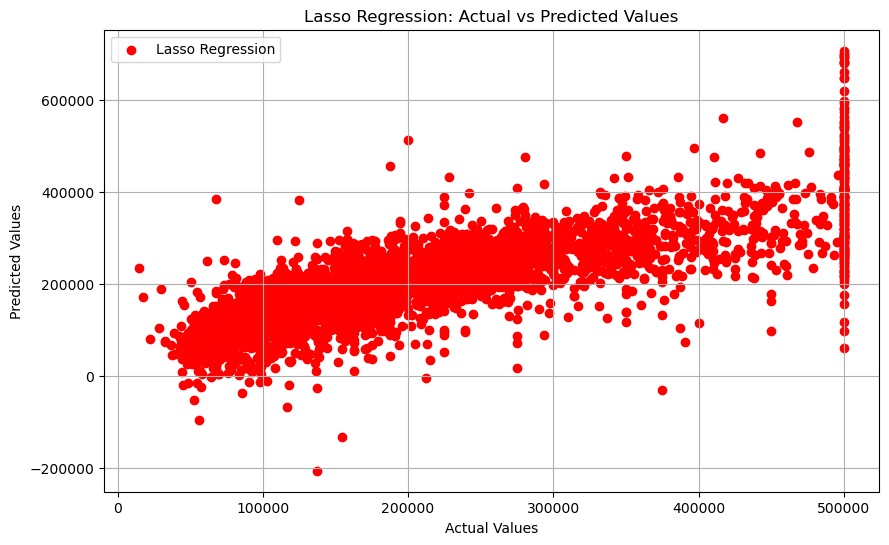

In [19]:
# Scatter plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='red', label='Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


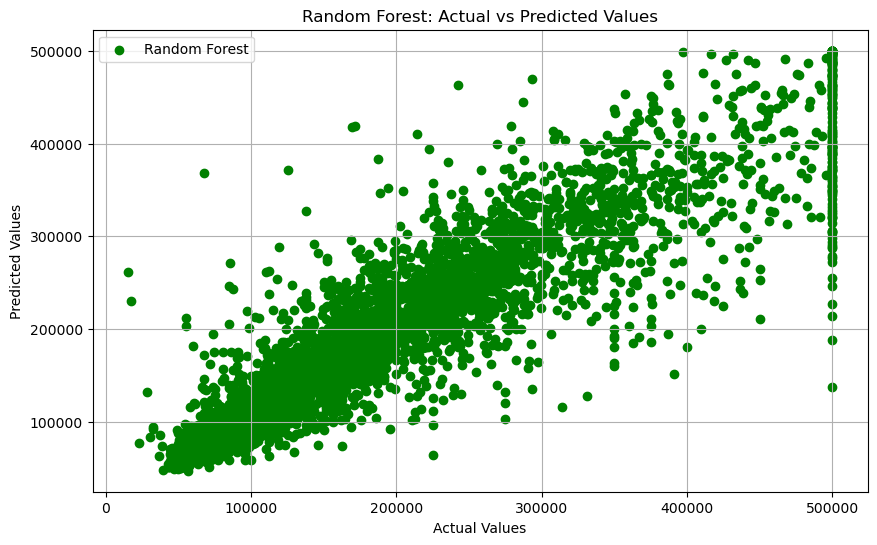

In [21]:
# Visualization - Comparing Predicted vs Actual Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, color='green', label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined